In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.1'

In [2]:
# load the dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
train_images.shape 


(60000, 28, 28)

In [7]:
len(train_labels) # train_labels.size

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape


(10000, 28, 28)

In [12]:
len(test_labels)


10000

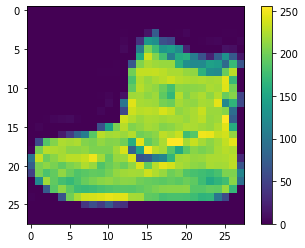

In [25]:
# Preprocessing the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
train_images = train_images / 255.0

test_images = test_images / 255.0

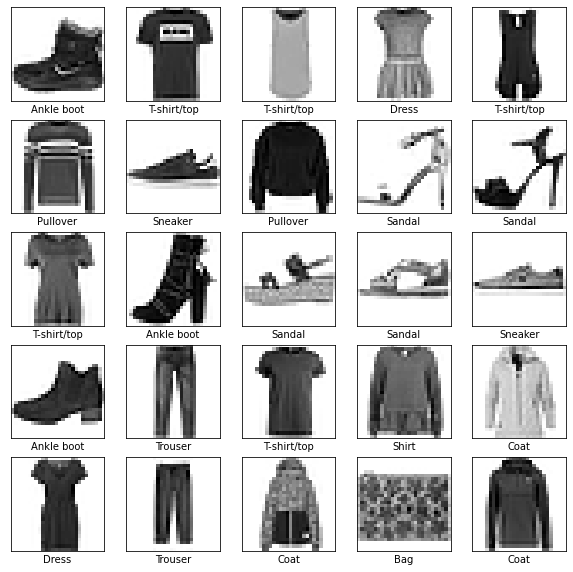

In [31]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5005 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.3768 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 2s 852us/step - loss: 0.3384 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.3138 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2699 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2582 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2499 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss:

In [51]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3307 - accuracy: 0.8843

Test accuracy: 0.8842999935150146


In [52]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [53]:
predictions = probability_model.predict(test_images)

In [54]:
predictions[0]

array([1.8711262e-07, 2.9667327e-10, 5.7522288e-07, 2.7192820e-10,
       2.0731390e-08, 7.1982904e-03, 1.6365327e-07, 9.2897080e-03,
       4.6209066e-06, 9.8350650e-01], dtype=float32)

In [55]:
np.argmax(predictions[0]) # to see the max number from the predictions

9

In [56]:
test_labels[0] # the real number

9

In [57]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

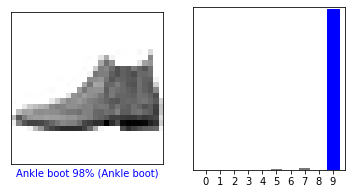

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

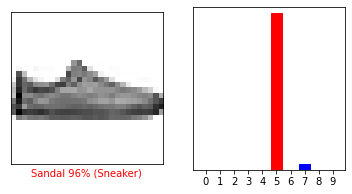

In [61]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

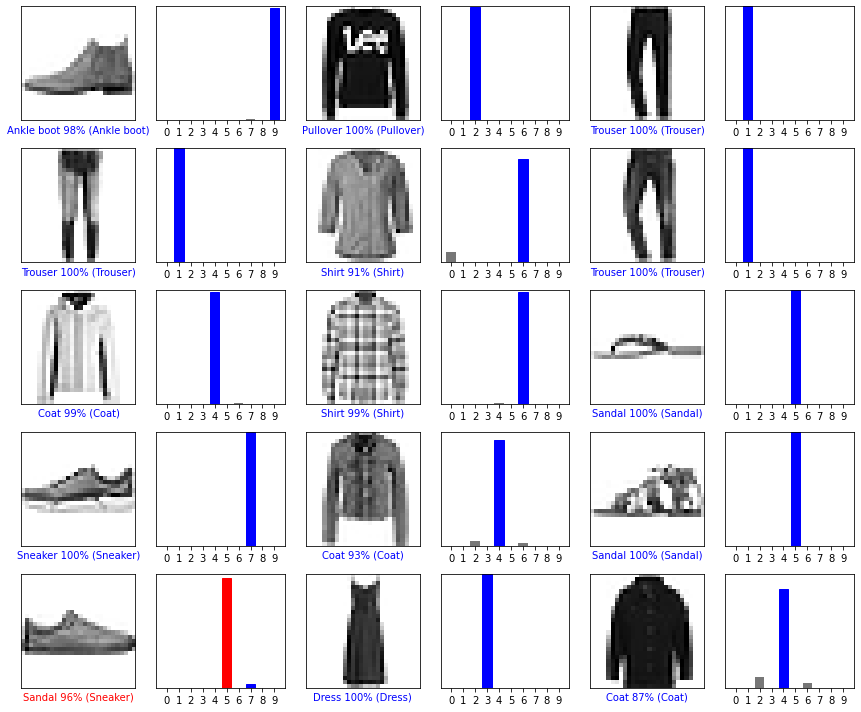

In [62]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [63]:
# Use the trained model
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [65]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [66]:
predictions_single = probability_model.predict(img) # tf.keras.Model.predict returns a list

print(predictions_single)

[[1.8950028e-05 6.3081745e-13 9.9651259e-01 1.5329172e-11 3.2375373e-03
  2.5308554e-11 2.3096849e-04 2.2747402e-15 3.1941947e-09 2.0711339e-16]]


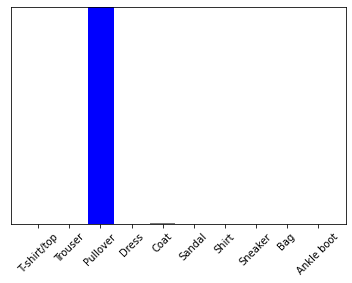

In [67]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [68]:
np.argmax(predictions_single[0]) 


2